## Final Project Submission

Please fill out:
* Student name: Christopher Miley 
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: Mark Barbour
* Blog post URL: https://www.blogger.com/blog/post/edit/1224276646261516200/1789492233906042393


In [1]:
#import libraries

import sqlite3
import pandas as pd

In [2]:
#load budget dataset

budget_df = pd.read_csv('movie_information_files/tn.movie_budgets.csv', index_col=0)

In [3]:
#inspect dataset

budget_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [4]:
#inspect value types

budget_df.dtypes

release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [5]:
#inspect size

budget_df.shape

(5782, 5)

In [6]:
#inspect for missing values

budget_df.describe()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
count,5782,5782,5782,5782,5782
unique,2418,5698,509,5164,5356
top,"Dec 31, 2014",Home,"$20,000,000",$0,$0
freq,24,3,231,548,367


In [7]:
#check for duplicate records

duplicates = budget_df.duplicated()
for row in duplicates:
    if not True:
        print(row)

In [8]:
#add a column to the dataset called 'total_profit'

budget_df['total_profit'] = budget_df['worldwide_gross'].str.replace(',', '').str.replace('$', '').astype(int) - budget_df['production_budget'].str.replace(',', '').str.replace('$', '').astype(int)

In [9]:
#change the format of 'total_profit' to reflect currency

budget_df['total_profit'] = budget_df['total_profit'].apply(lambda x: '${:,.0f}'.format(x))

In [10]:
#inspect edited dataset

budget_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit
id,,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279","$2,351,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875","$635,063,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350","$-200,237,650"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963","$1,072,413,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747","$999,721,747"


In [11]:
#import libraries for graphing

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [12]:
#make a copy of the dataset for visualization analysis

budget_graph_df = budget_df.copy()

In [13]:
#convert financial columns to numeric values

for column in ['production_budget', 'domestic_gross', 'worldwide_gross', 'total_profit']:
    budget_graph_df[column] = budget_graph_df[column].str.replace('$', '').str.replace(',', '').astype(int)

In [14]:
#convert 'release_date' column to datetime values

budget_graph_df['release_date'] = pd.to_datetime(budget_graph_df['release_date'])

#add another column that just reflects the release year called 'release_year' as a numeric value

budget_graph_df['release_year'] = budget_graph_df['release_date'].dt.year.astype(int)

In [15]:
#import library for adjusting format of graphing ticks

import matplotlib.ticker as ticker

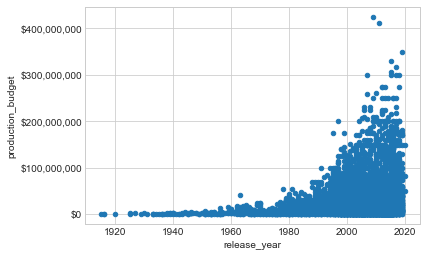

In [16]:
# Create a scatter plot to look for a linear relationship between release_year and production_budget
ax = budget_graph_df.plot.scatter(x='release_year', y='production_budget')

# Customize the y-axis tick labels
currency_formatter = ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x))
ax.yaxis.set_major_formatter(currency_formatter)

# Display the plot
plt.show()

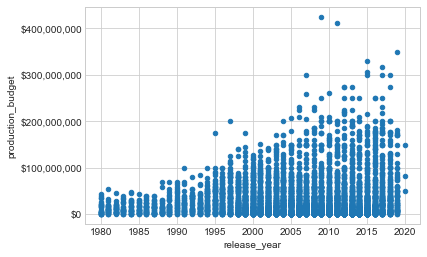

In [17]:
#filter to release years from 1980 to present day to inspect for a linear relationship to production_budget
year_filtered_budget_df = budget_graph_df[(budget_graph_df['release_year'] >= 1980)]

# Create a scatter plot to look for a linear relationship between release_year and production_budget
ax = year_filtered_budget_df.plot.scatter(x='release_year', y='production_budget')

# Customize the y-axis tick labels
currency_formatter = ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x))
ax.yaxis.set_major_formatter(currency_formatter)

# Display the plot
plt.show()

In [18]:
#calculate the correlation coefficient 
year_budget_correlation_coefficient = year_filtered_budget_df['release_year'].corr(year_filtered_budget_df['production_budget'])
print(year_budget_correlation_coefficient)

0.11741441973710044


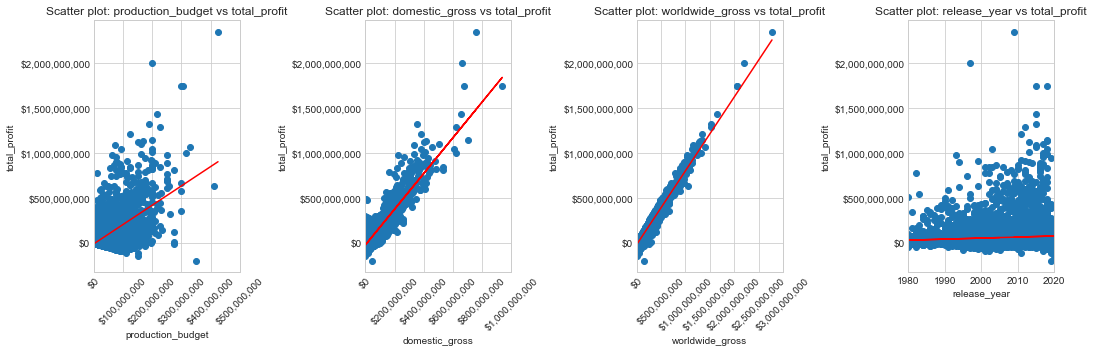

In [19]:
#use 'total_profit' as the target variable to run other variables against
target_variable = "total_profit"
numeric_columns = year_filtered_budget_df.select_dtypes(include='number').columns

# Exclude the target variable
numeric_columns = [col for col in numeric_columns if col != target_variable] 

#set up the plot
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_columns), figsize=(15, 5))

#iterate through each variable to plot against 'total_profit'
for index, column in enumerate(numeric_columns):
    if column != target_variable:
        ax = axes[index]
        ax.scatter(year_filtered_budget_df[column], year_filtered_budget_df[target_variable])
        if column != 'release_year':      #adjust the x ticks for currency graphs
            ax.xaxis.set_major_formatter(currency_formatter)
            ax.set_xlim(0)  # Set the lower limit of x-axis to zero
            ax.set_xticks(ax.get_xticks())
            ax.set_xticklabels([f'${x:,.0f}' for x in ax.get_xticks()], rotation=45)
        else:
            ax.set_xlim(1980, 2020)  #adjust the x ticks for release_year graph for better visual
        ax.yaxis.set_major_formatter(currency_formatter)  #adjust the y ticks to currency
        
        #set the labels and title
        ax.set_xlabel(column)
        ax.set_ylabel(target_variable)
        ax.set_title(f"Scatter plot: {column} vs {target_variable}")
        
        # Calculate linear regression line
        x = year_filtered_budget_df[column]
        y = year_filtered_budget_df[target_variable]
        slope, intercept = np.polyfit(x, y, deg=1)
        regression_line = slope * x + intercept

        # Plot linear regression line
        ax.plot(x, regression_line, color='red')

#adjust layout and show graphs
plt.tight_layout()
plt.show()

In [20]:
#set up a correlation matrix
correlation_matrix = year_filtered_budget_df.select_dtypes(include='number').corr()

#print out the correlation coefficients for each variable
print(correlation_matrix[target_variable])

production_budget    0.614824
domestic_gross       0.926814
worldwide_gross      0.982121
total_profit         1.000000
release_year         0.066601
Name: total_profit, dtype: float64


In [21]:
#import statsmodels library for model testing
import statsmodels.api as sm

In [22]:
#set the variables for the model
X = year_filtered_budget_df[["worldwide_gross"]]
y = year_filtered_budget_df["total_profit"]

In [23]:
#set the model
model = sm.OLS(endog=y, exog=sm.add_constant(X))

#set and print the results
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           total_profit   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                 1.499e+05
Date:                Fri, 05 Jan 2024   Prob (F-statistic):               0.00
Time:                        17:35:19   Log-Likelihood:            -1.0231e+05
No. Observations:                5511   AIC:                         2.046e+05
Df Residuals:                    5509   BIC:                         2.046e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.601e+07   4.26e+05    -

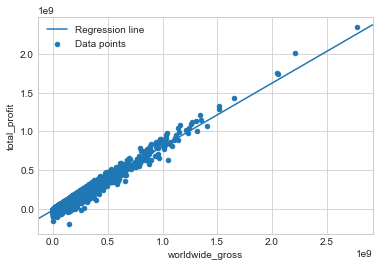

In [24]:
fig, ax = plt.subplots()
year_filtered_budget_df.plot.scatter(x="worldwide_gross", y="total_profit", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=results, label="Regression line", ax=ax)
ax.legend();

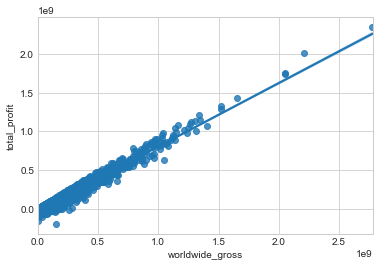

In [25]:
sns.regplot(x="worldwide_gross", y="total_profit", data=year_filtered_budget_df);

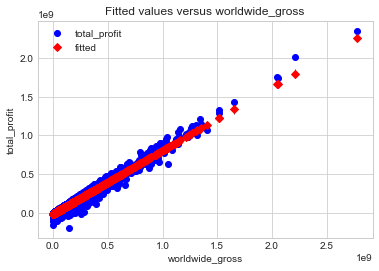

In [26]:
sm.graphics.plot_fit(results, "worldwide_gross")
plt.show()

In [27]:
print(results.conf_int())

                            0             1
const           -1.684328e+07 -1.517490e+07
worldwide_gross  8.162781e-01  8.245852e-01


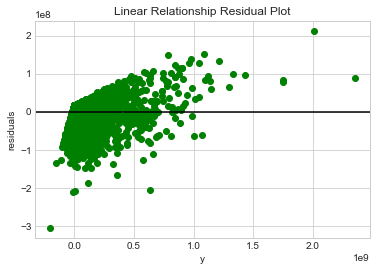

In [28]:
linear_model = sm.OLS(y, sm.add_constant(X))
linear_results = linear_model.fit()

fig, ax = plt.subplots()

ax.scatter(y, linear_results.resid, color="green")
ax.axhline(y=0, color="black")
ax.set_xlabel("y")
ax.set_ylabel("residuals")
ax.set_title("Linear Relationship Residual Plot");

In [29]:
from statsmodels.stats.diagnostic import linear_rainbow
linear_rainbow(linear_results)

(15.573281021250821, 0.0)

In [30]:
budget_graph_df.sort_values('total_profit', inplace=True, ascending=False)

In [31]:
budget_graph_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year
id,,,,,,,
1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345279,2009
43,1997-12-19,Titanic,200000000,659363944,2208208395,2008208395,1997
7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018
6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015
34,2015-06-12,Jurassic World,215000000,652270625,1648854864,1433854864,2015


In [32]:
top_twenty_profit_df = budget_graph_df.head(20)

In [33]:
top_twenty_profit_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year
id,,,,,,,
1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345279,2009
43,1997-12-19,Titanic,200000000,659363944,2208208395,2008208395,1997
7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018
6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015
34,2015-06-12,Jurassic World,215000000,652270625,1648854864,1433854864,2015
67,2015-04-03,Furious 7,190000000,353007020,1518722794,1328722794,2015
27,2012-05-04,The Avengers,225000000,623279547,1517935897,1292935897,2012
61,2011-07-15,Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,1216693157,2011
42,2018-02-16,Black Panther,200000000,700059566,1348258224,1148258224,2018


In [34]:
import matplotlib.ticker as ticker

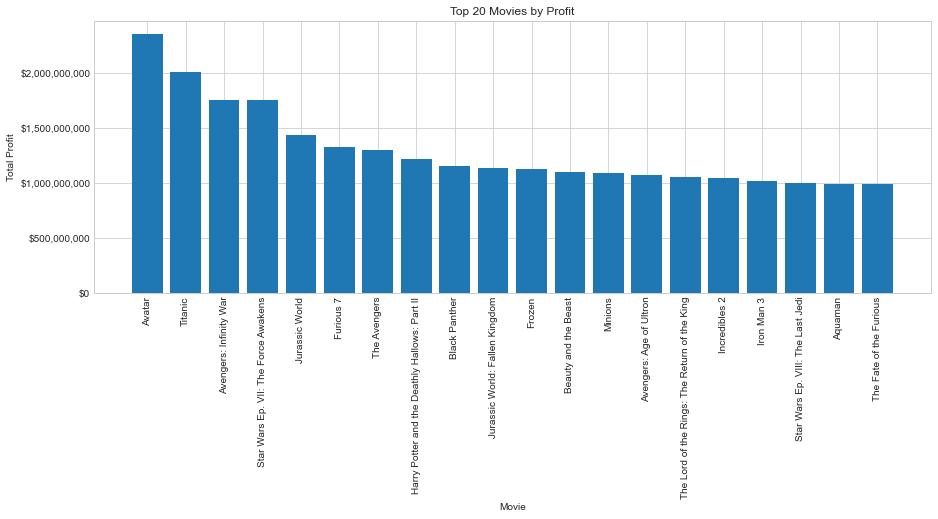

In [35]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.bar(top_twenty_profit_df['movie'], top_twenty_profit_df['total_profit'])

# Add labels and title
ax.set_xlabel('Movie')
ax.set_ylabel('Total Profit')
ax.set_title('Top 20 Movies by Profit')

# Format y-axis ticks with "$" symbol
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the graph
plt.show()

In [36]:
db_file = 'movie_information_files/im.db'
conn = sqlite3.connect(db_file)
cursor = conn.cursor()

In [37]:
pd.read_sql("""
            SELECT *
            FROM persons
            LIMIT 5;
""", conn)

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,None,None,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,None,None,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,None,None,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,None,None,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,None,None,"production_designer,art_department,set_decorator"


In [38]:
pd.read_sql("""
            SELECT *
            FROM movie_basics
            LIMIT 5;
""", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [39]:
pd.read_sql("""
            SELECT *
            FROM principals
            LIMIT 5;
""", conn)

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


In [40]:
query = """SELECT genres, start_year, primary_title, primary_name, primary_profession 
            FROM movie_basics
            JOIN principals
                USING(movie_id) 
            JOIN persons
                USING(person_id)
                WHERE category = "actor"
            ORDER BY primary_name;
"""
genre_df = pd.read_sql_query(query, conn)

In [41]:
genre_df

,genres,start_year,primary_title,primary_name,primary_profession
0,Adventure,2012,"Trash, a Bucky Jones Video",'Cowboy' Matt Hopewell,actor
1,"Biography,Documentary,History",2012,The Invisible String,'Crazy' John Brooks,None
2,"Crime,Documentary,Drama",2012,Out of the Woods: Life and Death in Dirty Dave...,'Dirty Dave' Grimsley,None
3,Action,2011,Makkan,'Ganja' Karuppu,actor
4,None,2019,Gilli Bambaram Goli,'Ganja' Karuppu,actor
...,...,...,...,...,...
256556,"Adventure,Family",2010,Algjör Sveppi og dularfulla hótelherbergið,Þröstur Leó Gunnarsson,"actor,soundtrack"
256557,Comedy,2014,Harry Og Heimir,Þröstur Leó Gunnarsson,"actor,soundtrack"
256558,Thriller,2016,Pale Star,Þröstur Leó Gunnarsson,"actor,soundtrack"
256559,Drama,2016,When You Least Expect It,Þór Tulinius,actor


In [42]:
genre_df['primary_name'] = genre_df['primary_name'].str.replace("""'""", '')

In [43]:
genre_df = genre_df.dropna(subset=['primary_profession'])

In [44]:
genre_df = genre_df[genre_df['primary_name'].str.match(r'^[a-zA-Z0-9]')]

In [45]:
genre_df['primary_name'] = genre_df['primary_name'].str.title()

In [46]:
genre_df.sort_values('primary_name', ascending=True, inplace=True)

In [47]:
genre_df

,genres,start_year,primary_title,primary_name,primary_profession
47,Drama,2011,King of the Ville,10Gzy,actor
52,Comedy,2014,Head Gone,2Face Idibia,actor
60,Action,2019,Escape Plan: The Extractors,50 Cent,"soundtrack,actor,producer"
59,"Action,Crime,Drama",2011,Setup,50 Cent,"soundtrack,actor,producer"
58,"Action,Crime,Thriller",2010,Gun,50 Cent,"soundtrack,actor,producer"
...,...,...,...,...,...
256042,Comedy,2015,Para Para Para,Zühtü Erkan,"actor,writer"
256043,Horror,2017,Nefrin,Zülfü Hamit Altin,actor
256044,"Comedy,Drama",2012,Ikizler firarda,Zülfü Hamit Altin,actor
256045,"Crime,Drama",2017,Damat Kogusu,Zülfü Hamit Altin,actor


In [48]:
genre_df.shape

(242253, 5)

In [49]:
pd.read_sql("""
            SELECT genres, COUNT(*) AS count
            FROM movie_basics
            GROUP BY genres;
""", conn)

,genres,count
0,None,5408
1,Action,2219
2,"Action,Adult,Comedy",2
3,"Action,Adventure",114
4,"Action,Adventure,Animation",197
...,...,...
1081,"Thriller,War,Western",1
1082,"Thriller,Western",4
1083,War,131
1084,"War,Western",1


In [50]:
hundred_profit_df = budget_graph_df.head(100)

In [51]:
merged_actor_profit_df = hundred_profit_df.merge(genre_df, left_on=['movie', 'release_year'], right_on=['primary_title', 'start_year'])

In [52]:
merged_actor_profit_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,genres,start_year,primary_title,primary_name,primary_profession
0,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018,"Action,Adventure,Sci-Fi",2018,Avengers: Infinity War,Chris Evans,"actor,producer,director"
1,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018,"Action,Adventure,Sci-Fi",2018,Avengers: Infinity War,Chris Hemsworth,"actor,soundtrack,producer"
2,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018,"Action,Adventure,Sci-Fi",2018,Avengers: Infinity War,Mark Ruffalo,"actor,producer,director"
3,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018,"Action,Adventure,Sci-Fi",2018,Avengers: Infinity War,Robert Downey Jr.,"actor,producer,soundtrack"
4,2015-06-12,Jurassic World,215000000,652270625,1648854864,1433854864,2015,"Action,Adventure,Sci-Fi",2015,Jurassic World,Chris Pratt,"actor,soundtrack,producer"
...,...,...,...,...,...,...,...,...,...,...,...,...
155,2012-03-23,The Hunger Games,80000000,408010692,677923379,597923379,2012,"Action,Adventure,Sci-Fi",2012,The Hunger Games,Liam Hemsworth,"actor,miscellaneous"
156,2012-03-23,The Hunger Games,80000000,408010692,677923379,597923379,2012,"Action,Adventure,Sci-Fi",2012,The Hunger Games,Stanley Tucci,"actor,producer,director"
157,2010-05-21,Shrek Forever After,165000000,238736787,756244673,591244673,2010,"Adventure,Animation,Comedy",2010,Shrek Forever After,Antonio Banderas,"actor,soundtrack,producer"
158,2010-05-21,Shrek Forever After,165000000,238736787,756244673,591244673,2010,"Adventure,Animation,Comedy",2010,Shrek Forever After,Eddie Murphy,"actor,writer,producer"


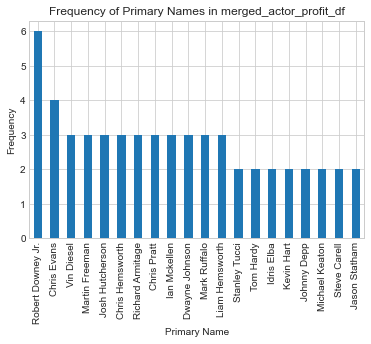

In [53]:
# Get the frequency of each primary_name
name_counts = merged_actor_profit_df['primary_name'].value_counts()

# Create the bar plot
name_counts.head(20).plot(kind='bar')

# Add labels and title
plt.xlabel('Primary Name')
plt.ylabel('Frequency')
plt.title('Frequency of Primary Names in merged_actor_profit_df')

# Display the graph
plt.show()

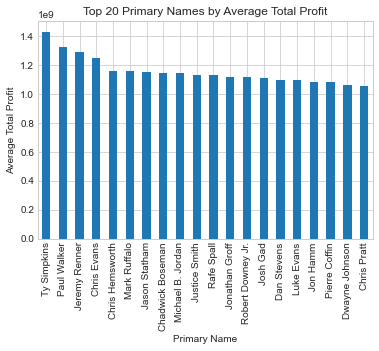

In [54]:
# Group by primary_name and calculate the average total_profit
grouped_actor_df = merged_actor_profit_df.groupby('primary_name')['total_profit'].mean()

# Get the top 20 based on highest averages
top_20_averages = grouped_actor_df.nlargest(20)

# Create the bar plot
top_20_averages.plot(kind='bar')

# Add labels and title
plt.xlabel('Primary Name')
plt.ylabel('Average Total Profit')
plt.title('Top 20 Primary Names by Average Total Profit')

# Display the graph
plt.show()

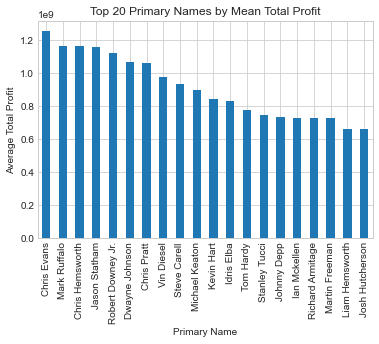

In [55]:
# Get the top 20 primary_names based on frequency
top_20_names = name_counts.head(20).index

# Filter the merged_actor_profit_df for the top 20 names
filtered_df = merged_actor_profit_df[merged_actor_profit_df['primary_name'].isin(top_20_names)]

# Calculate the mean total_profit for each primary_name
mean_profit = filtered_df.groupby('primary_name')['total_profit'].mean()

# Reindex mean_profit based on the index of name_counts
mean_profit = mean_profit.reindex(index=top_20_names)

# Sort mean_profit in ascending order
mean_profit = mean_profit.sort_values(ascending=False)

# Create the bar plot
mean_profit.plot(kind='bar')

# Add labels and title
plt.xlabel('Primary Name')
plt.ylabel('Average Total Profit')
plt.title('Top 20 Primary Names by Mean Total Profit')

# Display the graph
plt.show()

In [56]:
conn.close()